In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

In [57]:
os.makedirs('aggregated/experiment_1/', exist_ok=True)

header = ['index', 'id', 'rate', 'state', 'generation_time', 'ingestion_time', 'commit_time']
# load the results from the 10 runs
for i in range(1, 11):
    files = glob.glob(f'try_3/experiment_1/results/{str(i)}/*.csv')
    df = pd.concat([pd.read_csv(f, names=header) for f in files])
    # normalize the timestamps by subtracting the minimum ingestion time
    start_time = df['generation_time'].min()
    df['generation_time'] -= start_time
    df['ingestion_time'] -= start_time
    df['commit_time'] -= start_time
    os.makedirs(f'./aggregated/experiment_1/{str(i)}', exist_ok=True)
    df.to_csv(f'./aggregated/experiment_1/{str(i)}/all.csv')

In [58]:
for i in range(1, 11):
    df = pd.read_csv(f'./aggregated/experiment_1/{str(i)}/all.csv')

    leader = df[df['state'] == 'leader']
    follower = df[df['state'] == 'follower']

    # group the data by id
    leader = leader.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})
    follower = follower.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})

    # add a column for the processing time latency
    leader['processing_time_latency'] = leader['commit_time'] - leader['ingestion_time']
    follower['processing_time_latency'] = follower['commit_time'] - follower['ingestion_time']

    leader['state'] = 'leader'
    follower['state'] = 'follower'

    df = pd.concat([leader, follower])

    df.to_csv(f'./aggregated/experiment_1/{str(i)}/all.csv')

In [65]:
# load the results from the 10 runs into a single dataframe
df = pd.concat([pd.read_csv(f'./aggregated/experiment_1/{str(i)}/all.csv') for i in range(1, 11)])

df.to_csv('./experiment_1.csv')

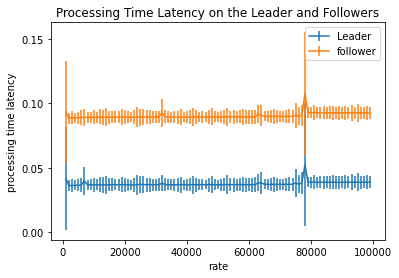

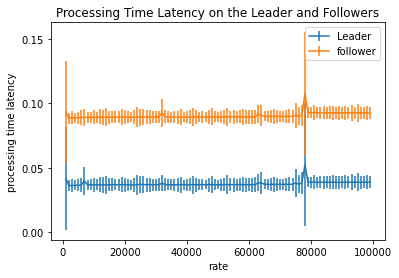

In [66]:
# set the plots width to be wider than the default
# plt.figure(figsize=(4, 8))

n = 1000


leader = df[df['state'] == 'leader']

# group the data by rate
leader = leader.groupby('rate').agg({'processing_time_latency': 'mean'})
# plot a moving average window of 1000
leader_mean = leader['processing_time_latency'].rolling(n).mean()
leader_std = leader['processing_time_latency'].rolling(n).std()
# plot the error bars
plt.errorbar(leader.index[n-1::n], leader_mean[n-1::n], yerr=leader_std[n-1::n], label='Leader')


follower = df[df['state'] == 'follower']

# group the data by rate
follower = follower.groupby('rate').agg({'processing_time_latency': 'mean'})
# plot a moving average window of 1000
follower_mean = follower['processing_time_latency'].rolling(n).mean()
follower_std = follower['processing_time_latency'].rolling(n).std()
# plot the error bars
plt.errorbar(follower_mean.index[n-1::n], follower_mean[n-1::n], yerr=follower_std[n-1::n], label='follower')

plt.xlabel('rate')
plt.ylabel('processing time latency')

# set y-axis ticks between 0 and 1
plt.yticks(np.arange(0.0, 0.2, 0.05))

plt.title('Processing Time Latency on the Leader and Followers')
plt.legend()
# plt.savefig('./images/experiment_1.pdf')
plt.show()
plt.close()

In [67]:
# print the average processing time latency of the leader
print(leader['processing_time_latency'].mean())

# print the average processing time latency of the follower
print(follower['processing_time_latency'].mean())

0.03762910652616498
0.09035637464759992
0.03762910652616498
0.09035637464759992


In [37]:
os.makedirs('aggregated/experiment_2/', exist_ok=True)
header = ['index', 'id', 'rate', 'state', 'generation_time', 'ingestion_time', 'commit_time']
# load the results from the 10 runs
for i in range(1, 11):
    files = glob.glob(f'try_3/experiment_2/results/{str(i)}/*.csv')
    df = pd.concat([pd.read_csv(f, names=header) for f in files])

    # normalize the timestamps by subtracting the minimum ingestion time
    start_time = df['generation_time'].min()
    df['generation_time'] -= start_time
    df['ingestion_time'] -= start_time
    df['commit_time'] -= start_time
    os.makedirs(f'./aggregated/experiment_2/{str(i)}', exist_ok=True)
    df.to_csv(f'./aggregated/experiment_2/{str(i)}/all.csv')

In [38]:
for i in range(1, 11):
    df = pd.read_csv(f'./aggregated/experiment_2/{str(i)}/all.csv')

    leader = df[df['state'] == 'leader']
    follower = df[df['state'] == 'follower']

    # group the data by id
    leader = leader.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})
    follower = follower.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})

    # add a column for the processing time latency
    leader['processing_time_latency'] = leader['commit_time'] - leader['ingestion_time']
    follower['processing_time_latency'] = follower['commit_time'] - follower['ingestion_time']

    leader['state'] = 'leader'
    follower['state'] = 'follower'

    df = pd.concat([leader, follower])

    df.to_csv(f'./aggregated/experiment_2/{str(i)}/all.csv')


In [39]:
# load the results from the 10 runs into a single dataframe
df = pd.concat([pd.read_csv(f'./aggregated/experiment_2/{str(i)}/all.csv') for i in range(1, 11)])

df.to_csv('./experiment_2.csv')

In [40]:
df = pd.read_csv('./experiment_2.csv', index_col=0)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


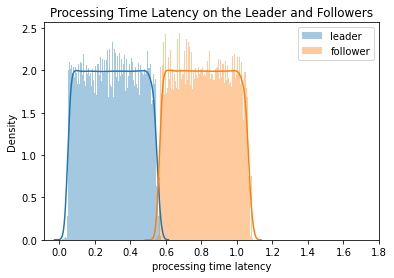

In [41]:
import seaborn as sns
import numpy as np

# create 100 bins between the minimum processing time latency and the maximum processing time latency
bins = np.linspace(df['processing_time_latency'].min(), df['processing_time_latency'].max(), 1000)

# make a distribution plot of the processing time latency
leader = df[df['state'] == 'leader']
follower = df[df['state'] == 'follower']
sns.distplot(leader['processing_time_latency'], label='leader', bins=bins)
sns.distplot(follower['processing_time_latency'], label='follower', bins=bins)
plt.legend()
plt.xlabel('processing time latency')
plt.ylabel('Density')
plt.title('Processing Time Latency on the Leader and Followers')
plt.xticks(np.arange(0, 2, 0.2))
plt.savefig('./images/experiment_2.pdf')


In [42]:
os.makedirs('aggregated/experiment_3/', exist_ok=True)
header = ['index', 'id', 'rate', 'state', 'generation_time', 'ingestion_time', 'commit_time']
# load the results from the 10 runs
for i in range(1, 11):
    files = glob.glob(f'try_3/experiment_3/results/{str(i)}/*.csv')
    df = pd.concat([pd.read_csv(f, names=header) for f in files])

    # normalize the timestamps by subtracting the minimum ingestion time
    start_time = df['generation_time'].min()
    df['generation_time'] -= start_time
    df['ingestion_time'] -= start_time
    df['commit_time'] -= start_time
    os.makedirs(f'./aggregated/experiment_3/{str(i)}', exist_ok=True)
    df.to_csv(f'./aggregated/experiment_3/{str(i)}/all.csv')

In [43]:
for i in range(1, 11):
    df = pd.read_csv(f'./aggregated/experiment_3/{str(i)}/all.csv')

    leader = df[df['state'] == 'leader']
    follower = df[df['state'] == 'follower']

    # group the data by id
    leader = leader.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})
    follower = follower.groupby('id').agg({'rate': 'min', 'generation_time': 'min', 'ingestion_time': 'mean', 'commit_time': 'max'})

    # add a column for the processing time latency
    leader['processing_time_latency'] = leader['commit_time'] - leader['ingestion_time']
    follower['processing_time_latency'] = follower['commit_time'] - follower['ingestion_time']

    leader['state'] = 'leader'
    follower['state'] = 'follower'

    df = pd.concat([leader, follower])

    df.to_csv(f'./aggregated/experiment_3/{str(i)}/all.csv')


In [44]:
# load the results from the 10 runs into a single dataframe
df = pd.concat([pd.read_csv(f'./aggregated/experiment_3/{str(i)}/all.csv') for i in range(1, 11)])

df.to_csv('./experiment_3.csv')

In [45]:
df = pd.read_csv('./experiment_3.csv', index_col=0)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


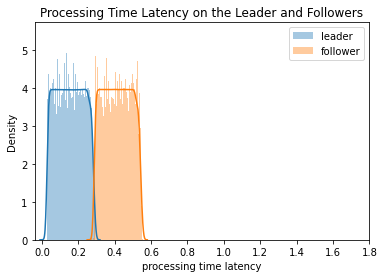

In [46]:
import seaborn as sns
import numpy as np

# create 100 bins between the minimum processing time latency and the maximum processing time latency
bins = np.linspace(df['processing_time_latency'].min(), df['processing_time_latency'].max(), 1000)

# make a distribution plot of the processing time latency
leader = df[df['state'] == 'leader']
follower = df[df['state'] == 'follower']
sns.distplot(leader['processing_time_latency'], label='leader', bins=bins)
sns.distplot(follower['processing_time_latency'], label='follower', bins=bins)
plt.legend()
plt.xlabel('processing time latency')
plt.ylabel('Density')
plt.title('Processing Time Latency on the Leader and Followers')

plt.xticks(np.arange(0, 2, 0.2))
plt.savefig('./images/experiment_3.pdf')